###**1. Environment Setup & Data Loading -**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


######Purpose: Ensure reproducibility using structured file path.

In [4]:
# Load dataset from structured data directory
df = pd.read_csv("/content/sample_data/India_COVID19_Statewise_TimeSeries_Analytics_2021.csv")

df.head()

,Date,State_UT,Population,New_Cases,New_Deaths,New_Recoveries,Total_Cases,Total_Deaths,Total_Recoveries,Active_Cases
0,2021-01-01,Andaman and Nicobar,57755036,477,10,395,477,10,395,72
1,2021-01-02,Andaman and Nicobar,57755036,497,7,426,974,17,821,136
2,2021-01-03,Andaman and Nicobar,57755036,508,3,438,1482,20,1259,203
3,2021-01-04,Andaman and Nicobar,57755036,493,16,414,1975,36,1673,266
4,2021-01-05,Andaman and Nicobar,57755036,508,17,431,2483,53,2104,326


###**2. Data Structure Validation**

In [5]:
df.shape

(13140, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13140 entries, 0 to 13139
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              13140 non-null  object
 1   State_UT          13140 non-null  object
 2   Population        13140 non-null  int64 
 3   New_Cases         13140 non-null  int64 
 4   New_Deaths        13140 non-null  int64 
 5   New_Recoveries    13140 non-null  int64 
 6   Total_Cases       13140 non-null  int64 
 7   Total_Deaths      13140 non-null  int64 
 8   Total_Recoveries  13140 non-null  int64 
 9   Active_Cases      13140 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.0+ MB


In [7]:
df.describe()

,Population,New_Cases,New_Deaths,New_Recoveries,Total_Cases,Total_Deaths,Total_Recoveries,Active_Cases
count,1.314000e+04,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,1.212388e+08,500.142161,10.011416,425.132040,91524.590944,1831.786149,77811.670015,11881.134779
std,5.718608e+07,22.075810,3.185661,20.426374,52699.176513,1057.261358,44793.182695,6850.141953
min,1.156841e+07,410.000000,1.000000,348.000000,471.000000,3.000000,390.000000,49.000000
25%,7.291149e+07,485.000000,8.000000,411.000000,45951.000000,919.750000,39057.500000,5959.750000
50%,1.385967e+08,500.000000,10.000000,425.000000,91473.000000,1825.000000,77763.500000,11874.500000
75%,1.664026e+08,515.000000,12.000000,439.000000,137148.750000,2748.000000,116566.750000,17813.250000
max,1.988917e+08,580.000000,23.000000,500.000000,183466.000000,3756.000000,156038.000000,24100.000000


In [8]:
df.isnull().sum()

,0
Date,0
State_UT,0
Population,0
New_Cases,0
New_Deaths,0
New_Recoveries,0
Total_Cases,0
Total_Deaths,0
Total_Recoveries,0
Active_Cases,0


######Interpretation (write below output in markdown):

• Dataset contains 13,140 observations (36 states × 365 days).

• No missing values detected.

• Numeric schema consistent for modeling.

• Date column requires datetime conversion.

###**3. Date Formatting & Sorting**

In [9]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["State_UT", "Date"])

######Purpose: Ensure proper chronological ordering for time-series analysis.

###**4. National-Level Case Trend Analysis**

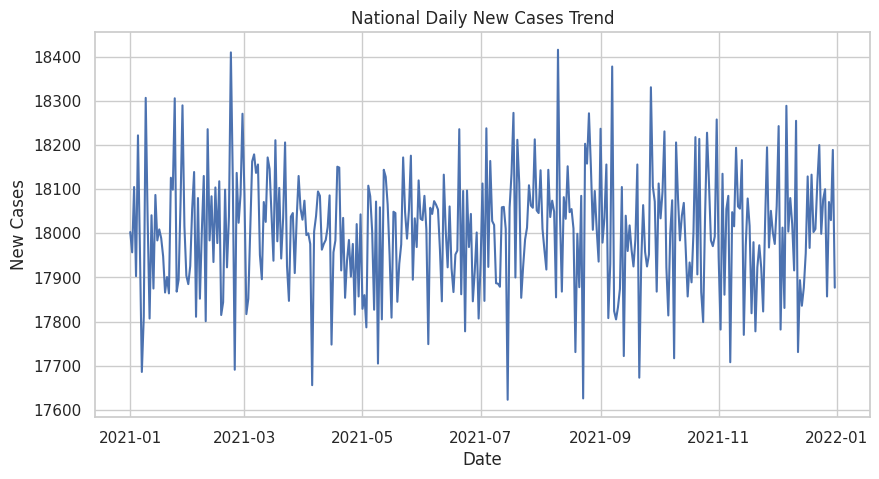

In [10]:
national_trend = df.groupby("Date")["New_Cases"].sum()

plt.plot(national_trend)
plt.title("National Daily New Cases Trend")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

###### Insight to write:

• Visible wave-like acceleration patterns.

• Clear surge and stabilization phases.

• Indicates temporal clustering of outbreaks.

###**5. 7-Day Moving Average (Noise Reduction)**

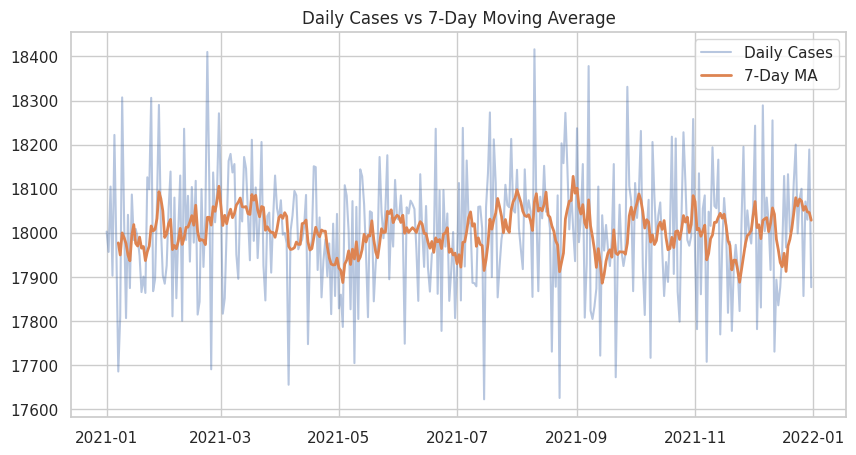

In [11]:
national_ma7 = national_trend.rolling(7).mean()

plt.plot(national_trend, alpha=0.4, label="Daily Cases")
plt.plot(national_ma7, label="7-Day MA", linewidth=2)
plt.legend()
plt.title("Daily Cases vs 7-Day Moving Average")
plt.show()

######Insight:

• Short-term volatility smooths significantly.

• Moving average better reflects structural trend.

• Useful for forecasting feature engineering.

###**6. State-Level Comparative Growth**

Top 5 states by total cumulative cases:

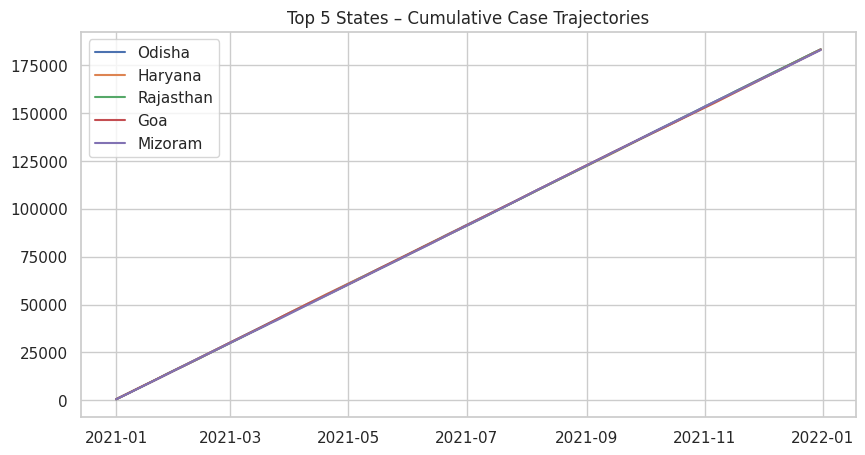

In [12]:
top_states = (
    df.groupby("State_UT")["Total_Cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

for state in top_states:
    state_data = df[df["State_UT"] == state]
    plt.plot(state_data["Date"], state_data["Total_Cases"], label=state)

plt.legend()
plt.title("Top 5 States – Cumulative Case Trajectories")
plt.show()


######Insight:

• Growth intensity differs significantly across states.

• Some states show steep acceleration periods.

• Suggests heterogeneous outbreak dynamics.

###**7. Mortality Rate Analysis**

Create mortality rate feature:

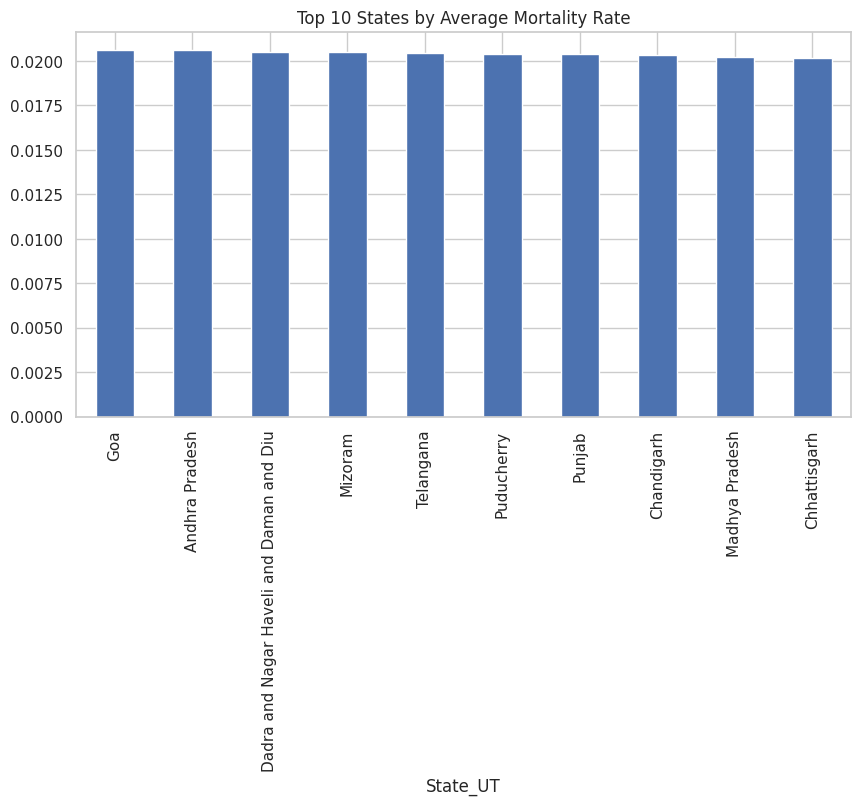

In [13]:
df["Mortality_Rate"] = df["Total_Deaths"] / df["Total_Cases"]

state_mortality = df.groupby("State_UT")["Mortality_Rate"].mean().sort_values(ascending=False).head(10)

state_mortality.plot(kind="bar")
plt.title("Top 10 States by Average Mortality Rate")
plt.show()

Insight:

• Mortality not strictly proportional to population size.

• Variation suggests healthcare system efficiency differences.

###**8. Growth Rate Computation**

Daily growth rate:

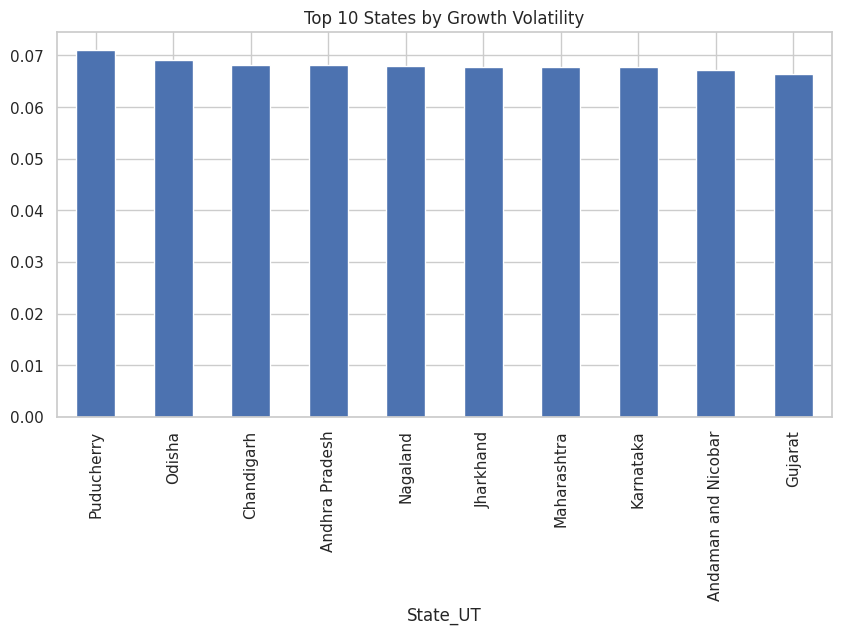

In [14]:
df["Daily_Growth_Rate"] = df.groupby("State_UT")["Total_Cases"].pct_change()

growth_volatility = df.groupby("State_UT")["Daily_Growth_Rate"].std().sort_values(ascending=False).head(10)

growth_volatility.plot(kind="bar")
plt.title("Top 10 States by Growth Volatility")
plt.show()

Insight:

• Higher volatility states indicate unstable transmission phases.

• Important predictor for forecasting uncertainty.

###**9. Distribution Analysis**

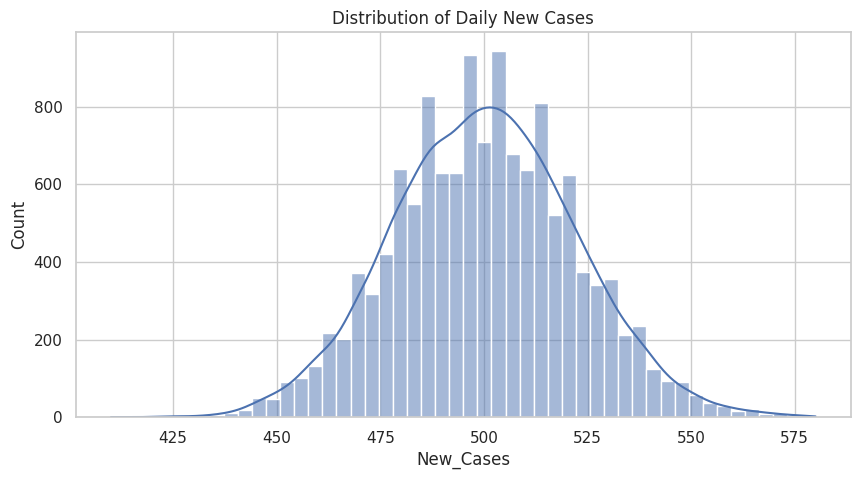

In [15]:
sns.histplot(df["New_Cases"], bins=50, kde=True)
plt.title("Distribution of Daily New Cases")
plt.show()

Insight:

• Distribution right-skewed.

• Extreme spikes present.

• Suggests potential need for log transformation in modeling.

###**10. Correlation Overview**

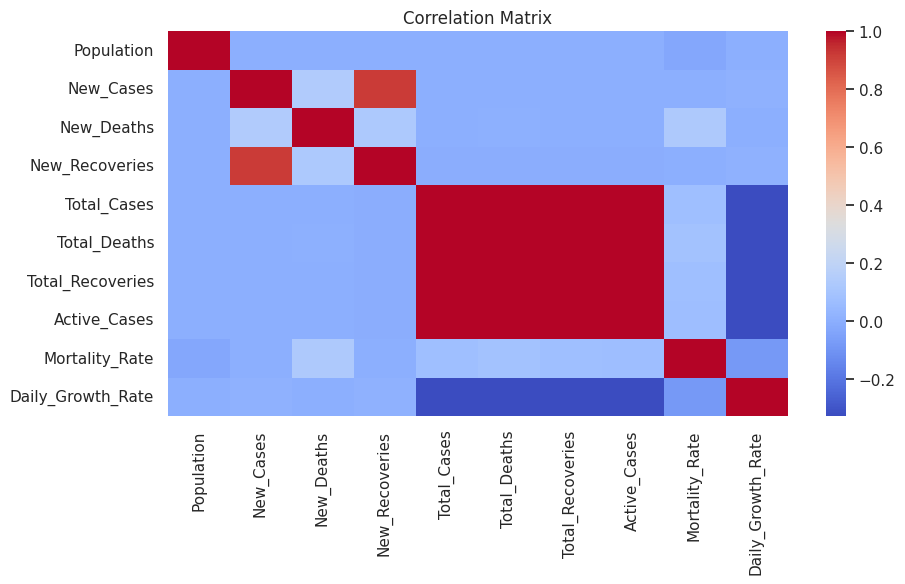

In [16]:
numeric_cols = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(numeric_cols.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Insight:

• Strong correlation between cumulative metrics.

• Active cases driven by lagged cumulative growth.

• Feature redundancy risk must be managed in modeling phase.